# Stage1. Import Dependencies.

In [7]:
import pandas as pd
import re
import seaborn as sns
import spacy
import nltk
nltk.download('wordnet')
from spacy import displacy 
from collections import Counter 
import en_core_web_sm  
nlp = en_core_web_sm.load()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Stage2. Data Preparation

## Load File in df.

In [2]:
df=pd.read_csv('/content/sample_data/Review.csv')

In [3]:
df.head()

,Restaurant,description
0,Fable,Recommendations below!\n100% make reservation\...
1,Fable,I couldn't ask for more on a slow night at the...
2,Fable,Whoa! It's been a while .\nAnd the wait was wo...
3,Fable,Came here for a brunch date on a Saturday arou...
4,Fable,There are many brunch spots on this stretch of...


## Data Cleaning.

### Download nlppreprocess to remove stopwords except not,couldn't,wouldn't like words which give meaning to negative review.

In [4]:
!pip install nlppreprocess

In [8]:
from nlppreprocess import NLP
obj=NLP(lemmatize=True,lemmatize_method='wordnet')

### Replace unwanted data.

In [9]:
# Replace unwanted text \n and punctuations with whitespace
df = df.replace(to_replace ='[\n!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', value = ' ', regex = True) 

# Convert Review in lower form.
df_lower = pd.DataFrame(df.description.str.lower())

# update lower data in df
df.update(df_lower)

#Using pandas library with obj.process to remove stopwords
df['description']=df['description'].apply(obj.process)


### Data after cleaning.

In [10]:
df.head()

,Restaurant,description
0,Fable,recommendation make reservation pork rib speci...
1,Fable,could not ask more slow night restaurant they ...
2,Fable,whoa it s been and wait worth now vegan it s b...
3,Fable,came brunch date saturday around noon and got ...
4,Fable,there are many brunch spot stretch th ave and ...


# Stage3. Exploratory Data Analysis.

### Visualization of no of restaurant with their review count.

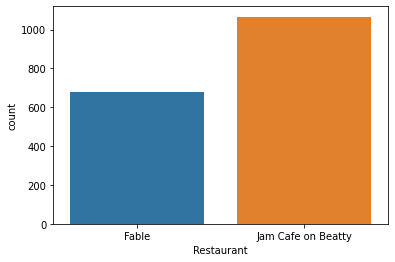

In [11]:
sns.countplot(x='Restaurant',data=df)

### we have two Restaurant review data.
* Fable : with 600+ Review
* Jam Cafe on Beatty : with 1000+ Review

## Entity Recognition in all review.

In [12]:
# Tokenize each row in Review column and assign in list.
doc_list=[nlp(each)for each in df['description']]

# Total entity labels in Review Data
labels = [x.label_ for doc in doc_list for x in doc.ents]
c_labels=Counter(labels)
print(c_labels)

Counter({'PERSON': 1194, 'CARDINAL': 861, 'GPE': 742, 'TIME': 700, 'DATE': 666, 'ORG': 573, 'NORP': 469, 'ORDINAL': 280, 'LOC': 67, 'PRODUCT': 63, 'FAC': 53, 'LANGUAGE': 27, 'EVENT': 12, 'QUANTITY': 9, 'MONEY': 6, 'WORK_OF_ART': 4})


## Create dataframe with entity name and their no of occurance in Review.

In [13]:
d={"EntityLabel":[k for k in c_labels.keys()],"Count":[v for v in c_labels.values()]}

In [14]:
labels_df=pd.DataFrame(d)
labels_df.head()

,EntityLabel,Count
0,TIME,700
1,PERSON,1194
2,ORG,573
3,DATE,666
4,NORP,469


## Visualization of entites with count of words they contain in Review.

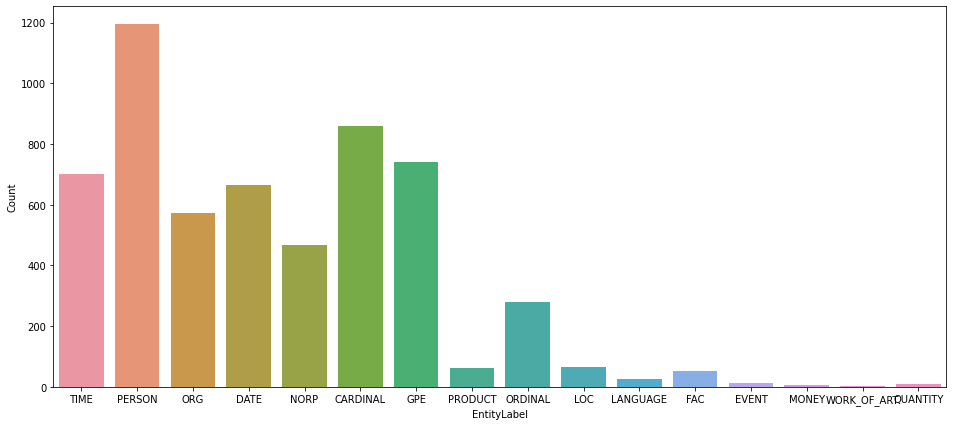

In [15]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,7))
sns.barplot(x='EntityLabel',y='Count',data=labels_df)

Person, Cardinal, GPE, Time, ORG type words have more occurance in dataset.

In [16]:
displacy.render(nlp(str(df['description'][30])), jupyter=True, style='ent') 

### Next, we verbatim, extract part-of-speech and lemmatize this sentence.

In [18]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(df['description'][7])) if y.pos_ != 'PUNCT']]

[('fable', 'ADJ', 'fable'),
 ('been', 'AUX', 'be'),
 ('my', 'DET', '-PRON-'),
 ('list', 'NOUN', 'list'),
 ('long', 'ADJ', 'long'),
 ('time', 'NOUN', 'time'),
 ('and', 'CCONJ', 'and'),
 ('i', 'PRON', 'i'),
 ('m', 'VERB', 'm'),
 ('disappointed', 'VERB', 'disappoint'),
 ('taken', 'VERB', 'take'),
 ('long', 'ADV', 'long'),
 ('try', 'VERB', 'try'),
 ('out', 'ADP', 'out'),
 ('love', 'NOUN', 'love'),
 ('they', 'PRON', '-PRON-'),
 ('support', 'VERB', 'support'),
 ('local', 'ADJ', 'local'),
 ('farm', 'NOUN', 'farm'),
 ('and', 'CCONJ', 'and'),
 ('get', 'AUX', 'get'),
 ('fresh', 'ADJ', 'fresh'),
 ('ingredient', 'NOUN', 'ingredient'),
 ('daily', 'ADJ', 'daily'),
 ('they', 'PRON', '-PRON-'),
 ('even', 'ADV', 'even'),
 ('rooftop', 'VERB', 'rooftop'),
 ('garden', 'NOUN', 'garden'),
 ('grow', 'VERB', 'grow'),
 ('their', 'DET', '-PRON-'),
 ('ingredient', 'NOUN', 'ingredient'),
 ('we', 'PRON', '-PRON-'),
 ('came', 'VERB', 'come'),
 ('my', 'DET', '-PRON-'),
 ('birthday', 'NOUN', 'birthday'),
 ('dinner', 

# Stage4. Save Clean Review corpus as CSV.

In [19]:
df.to_csv('Review_Corpus.csv',index=False)

### Note: Check 2_Sentiment_Categorization_with_PolarityScore.ipynb